# Лабораторная №2

## Задание №1

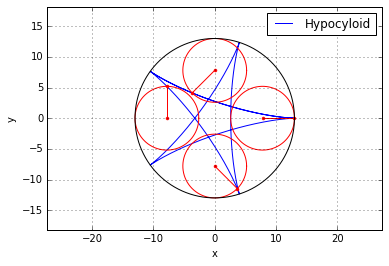

In [16]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

def hypocycloid(R, r):
    t = np.arange(0, 15, 0.01)
    x = (R-r)*np.cos(t)+r*np.cos((R-r)/r*t)
    y = (R-r)*np.sin(t)-r*np.sin((R-r)/r*t)
    # Рисуем гипоциклойду
    plt.plot(x, y, label='Hypocyloid')
    # Рисуем малые окружности
    tt = [0, np.pi/2, np.pi, 3*np.pi/2]
    for t_ in tt:
        # Координаты центра малой окружности
        xc = (R-r)*np.cos(t_)
        yc = (R-r)*np.sin(t_)
        # Координаты точки на гипоциклойде
        xp = (R-r)*np.cos(t_)+r*np.cos((R-r)/r*t_)
        yp = (R-r)*np.sin(t_)-r*np.sin((R-r)/r*t_)
        # Строим окружность
        ttt = np.arange(0, 2*np.pi, 0.01)
        plt.plot(r*np.cos(ttt)+xc, r*np.sin(ttt)+yc, color='red')
        # Строим радиус
        plt.plot([xc, xp], [yc, yp], 
                 color='red', marker='.')
    # Рисуем большую окружность
    t = np.arange(0, 2*np.pi, 0.001)
    plt.plot(R*np.cos(t), R*np.sin(t), color='black')

    # Настраиваем оси и сетку
    plt.axis('equal')
    plt.xlim([-R-r, R+r])
    plt.ylim([-R-r, R+r])
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

R = 13
r = 5.2
# Строим гипоциклойду
hypocycloid(R, r)


## Задание №2

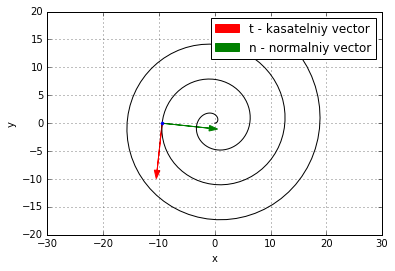

<function __main__.frenet>

In [17]:
def frenet(phi0):
    # В качестве кривой возьмем спираль
    phi = np.arange(0, 20, 0.1)
    r = 1
    x = r*phi*np.cos(phi)
    y = r*phi*np.sin(phi)

    # Тангенциальный вектор t = [dx/dphi, dy/dphi]/sqrt(dx/dphi^2+dy/dphi^2)
    t = [r*np.cos(phi0)-r*phi0*np.sin(phi0),
         r*np.sin(phi0)+r*phi0*np.cos(phi0)]
    t = t/np.sqrt(t[0]**2+t[1]**2)
    # Нормальный вектор т = [-d2y/dphi2, d2x/dphi2]/sqrt(dx/dphi^2+dy/dphi^2)
    n = [-r*np.sin(phi0)-r*phi0*np.cos(phi0),
         r*np.cos(phi0)-r*phi0*np.sin(phi0)]
    n = n/np.sqrt(n[0]**2+n[1]**2)
    # Постоим эту кривую
    plt.plot(x, y, color='black')
    # Функция перевода из полярной в декартову систему координат
    def pol2cart(r, phi):
        x = r*np.cos(phi)
        y = r*np.sin(phi)
        return(x, y)
    # Построим начальную точку
    x0, y0 = pol2cart(r*phi0, phi0)
    plt.plot(x0, y0, color='blue', marker='.')
    # Построи каcательный вектор
    arrow_t = plt.arrow(x0, y0, t[0]*10, t[1]*10,
                      head_width=1, length_includes_head=True, fc='red', ec='red')
    # Построим вектор нормали
    arrow_n = plt.arrow(x0, y0, n[0]*10, n[1]*10,
                      head_width=1, length_includes_head=True, fc='green', ec='green')

    # Настраиваем оси, легенду и сетку
    plt.legend([arrow_t, arrow_n], ['t - kasatelniy vector','n - normalniy vector'])
    plt.axis('equal')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
from ipywidgets import widgets
widgets.interact(frenet, phi0=(0.0, np.pi*6))

## Задание №3

In [18]:
def evoluta(x, y, dx, dy, ddx, ddy):
    '''
    Расчет эволюты поточечно
    x, dx, ddx - координата x, первая и вторая производная в точке (x,y)
    y, dy, ddy - координата y, первая и вторая производная в точке (x,y)
    '''
    X = x-dy*(dx**2+dy**2)/(dx*ddy-ddx*dy)
    Y = y+dx*(dx**2+dy**2)/(dx*ddy-ddx*dy)
    return X, Y


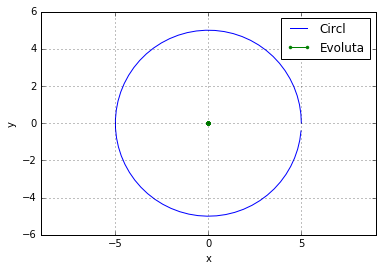

In [19]:
# Строим окружность
t = np.arange(0, 2*np.pi, 0.1)
R = 5
x = R*np.cos(t)
y = R*np.sin(t)

dx = -R*np.sin(t)
dy = R*np.cos(t)

ddx = -R*np.cos(t)
ddy = -R*np.sin(t)

X, Y = evoluta(x, y, dx, dy, ddx, ddy)

plt.plot(x, y, label='Circl')
plt.plot(X, Y, marker='.', label='Evoluta')

# Настраиваем оси, легенду и сетку
plt.legend()
plt.axis('equal')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

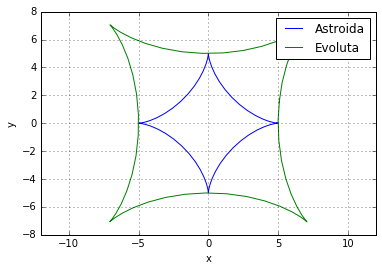

In [20]:
# Строим астройду
t = np.arange(0.1, 2*np.pi+0.2, 0.1)
R = 5
x = R*(np.cos(t))**3
y = R*(np.sin(t))**3

dx = -3*R*(np.cos(t))**2*np.sin(t)
dy = 3*R*(np.sin(t))**2*np.cos(t)

ddx = -3/4*R*(np.cos(t)+3*np.cos(3*t))
ddy = -3/4*R*(np.sin(t)-3*np.sin(3*t))

X, Y = evoluta(x, y, dx, dy, ddx, ddy)

plt.plot(x, y, label='Astroida')
plt.plot(X, Y, label='Evoluta')

# Настраиваем оси, легенду и сетку
plt.legend()
plt.axis('equal')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

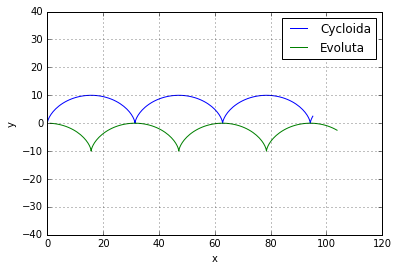

In [21]:
# Строим циклойду
t = np.arange(0.1, 20, 0.1)
R = 5
x = R*(t-np.sin(t))
y = R*(1-np.cos(t))

dx = R*(1-np.cos(t))
dy = R*(np.sin(t))

ddx = R*np.sin(t)
ddy = R*np.cos(t)

X, Y = evoluta(x, y, dx, dy, ddx, ddy)

plt.plot(x, y, label='Cycloida')
plt.plot(X, Y, label='Evoluta')

# Настраиваем оси, легенду и сетку
plt.legend()
plt.axis('equal')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [22]:
from sympy import *
def symbolic_evoluta(x, y):
    '''
    Расчет эволюты символьно
    '''
    dx, ddx, dy, ddy, X, Y = symbols("x' x'' y' y'' X Y ")
    
    dx = diff(x, t)
    ddx = diff(x, t, t)
    
    dy = diff(y, t)
    ddy = diff(y, t, t)
    
    X = x-dy*(dx**2+dy**2)/(dx*ddy-ddx*dy)
    Y = y+dx*(dx**2+dy**2)/(dx*ddy-ddx*dy)
    return X, Y 

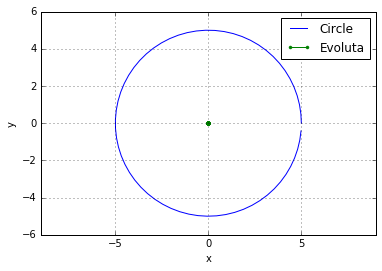

In [23]:
# Используем символьные вычсиления для нахождения производных
t = symbols('t')
x, y = symbols('x y')
R = 5

x = R*cos(t)
y = R*sin(t)

X, Y = symbolic_evoluta(x, y) 

t_arr = np.arange(0, 2*np.pi, 0.1)

# Эта функция конвертирует символьные данные в массив чисел
def sym2array(sym, t):
    return np.array([sym.evalf(subs={'t':t_}) for t_ in t])
x_arr = sym2array(x, t_arr)
y_arr = sym2array(y, t_arr)
X_arr = sym2array(X, t_arr)
Y_arr = sym2array(Y, t_arr)

plt.plot(x_arr, y_arr, label = 'Circle')
plt.plot(X_arr, Y_arr, marker='.', label='Evoluta')

# Настраиваем оси, легенду и сетку
plt.legend()
plt.axis('equal')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


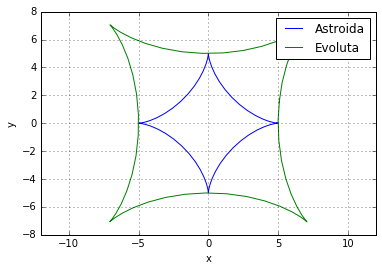

In [24]:
# Строим астройду
t = symbols('t')
x, y = symbols('x y')
R = 5

x = R*(cos(t))**3
y = R*(sin(t))**3

X, Y = symbolic_evoluta(x, y) 
# Конвертируем символьные данные в массив чисел
t_arr = np.arange(0.1, 2*np.pi+0.2, 0.1)
x_arr = sym2array(x, t_arr)
y_arr = sym2array(y, t_arr)
X_arr = sym2array(X, t_arr)
Y_arr = sym2array(Y, t_arr)

# Строим графики
plt.plot(x_arr, y_arr, label='Astroida')
plt.plot(X_arr, Y_arr, label='Evoluta')
# Настраиваем оси, легенду и сетку
plt.legend()
plt.axis('equal')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

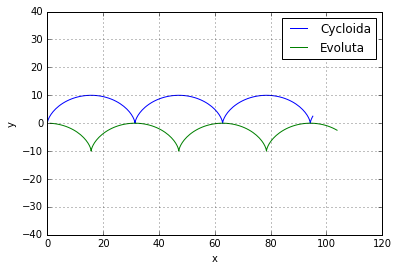

In [25]:
# Строим циклойду
t = symbols('t')
x, y = symbols('x y')
R = 5
x = R*(t-sin(t))
y = R*(1-cos(t))

X, Y = symbolic_evoluta(x, y) 
# Конвертируем символьные данные в массив чисел
t_arr = np.arange(0.1, 20, 0.1)
x_arr = sym2array(x, t_arr)
y_arr = sym2array(y, t_arr)
X_arr = sym2array(X, t_arr)
Y_arr = sym2array(Y, t_arr)

# Строим графики
plt.plot(x_arr, y_arr, label='Cycloida')
plt.plot(X_arr, Y_arr, label='Evoluta')
# Настраиваем оси, легенду и сетку
plt.legend()
plt.axis('equal')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## Задание 4

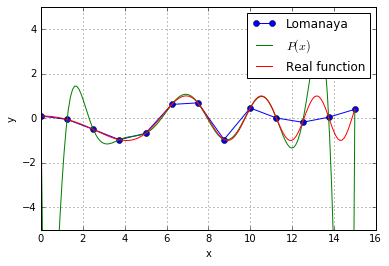

In [31]:
def func(N):
    x = np.linspace(0, 15, N)
    y = np.sin((1-x**2)/10)

    p = np.polyfit(x, y, N-1)

    plt.plot(x, y, label='Lomanaya', marker='o')


    xx = np.linspace(0, 15, 150)
    np.polyval(p, xx)

    # Строим график
    plt.plot(xx, np.polyval(p, xx), label='$P(x)$')
    plt.plot(xx, np.sin((1-xx**2)/10),  label='Real function')
    # Настраиваем оси
    plt.ylim([-5, 5])
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.show()
widgets.interact(func, N=(3, 18))